In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

import statsmodels.api as sm
from scipy.stats import gaussian_kde
from statsmodels.stats import diagnostic


from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.experimental import enable_iterative_imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


plt.style.use('dark_background')
from sklearn.linear_model import LinearRegression
import xgboost as xgb



In [3]:
!pip install --upgrade scikit-learn
!pip uninstall category-encoders -y
!pip install git+https://github.com/scikit-learn-contrib/categorical-encoding

import category_encoders as ce

Found existing installation: category_encoders 2.8.1
Uninstalling category_encoders-2.8.1:
  Successfully uninstalled category_encoders-2.8.1
  Cloning https://github.com/scikit-learn-contrib/categorical-encoding to /private/var/folders/_g/n8cgq37145zbzhr4scl00zjc0000gn/T/pip-req-build-3qrj0i28
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/categorical-encoding /private/var/folders/_g/n8cgq37145zbzhr4scl00zjc0000gn/T/pip-req-build-3qrj0i28
  Resolved https://github.com/scikit-learn-contrib/categorical-encoding to commit 9a86233c51d8ed3c2809126bb0ab9523c4c379bd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for category_encoders: filename=category_encoders-2.8.1-py3-none-any.whl size=85718 sha256=4828dcdd7430987fdd717ca4d75e465059f22706733aaef1ed4a42a05b8f7926
  Stored in directory: /private/var/folders/_g/n8cgq37145zbzhr4scl00zjc0000gn/

In [4]:
import pandas as pd

# 读取CSV文件（假设文件在相同目录）
df = pd.read_csv('car_prices.csv')

# 确保year列是整数类型（处理可能的字符串类型）
df['year'] = df['year'].astype(int)

# 过滤2014和2015年的数据
filtered_df = df[df['year'].isin([2014, 2015])]

# 显示前5行
print("过滤后的数据量:", len(filtered_df))
print("\n前5行数据示例:")
print(filtered_df.head())

# 可选：保存到新文件
filtered_df.to_csv('car_sales_2014_2015.csv', index=False)

过滤后的数据量: 90507

前5行数据示例:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1        

In [5]:
df = pd.read_csv('Dashboard/car_sales_2014_2015.csv')

In [6]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
df.interior.unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'red', 'orange',
       'burgundy', nan, 'blue', 'silver', 'white', 'off-white', 'green',
       'yellow', 'purple', 'gold'], dtype=object)

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90507 entries, 0 to 90506
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          90507 non-null  int64  
 1   make          89797 non-null  object 
 2   model         89699 non-null  object 
 3   trim          89797 non-null  object 
 4   body          89694 non-null  object 
 5   transmission  78686 non-null  object 
 6   vin           90503 non-null  object 
 7   state         90507 non-null  object 
 8   condition     90114 non-null  float64
 9   odometer      90504 non-null  float64
 10  color         90302 non-null  object 
 11  interior      90302 non-null  object 
 12  seller        90507 non-null  object 
 13  mmr           90479 non-null  float64
 14  sellingprice  90505 non-null  float64
 15  saledate      90505 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 11.0+ MB


In [9]:

df.isna().sum()


year                0
make              710
model             808
trim              710
body              813
transmission    11821
vin                 4
state               0
condition         393
odometer            3
color             205
interior          205
seller              0
mmr                28
sellingprice        2
saledate            2
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(77706, 16)

In [12]:
df.isna().sum()


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [13]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [14]:
df[[
   'condition', 'odometer', 'mmr',
       'sellingprice']].corr()

,condition,odometer,mmr,sellingprice
condition,1.000000,0.041031,0.061471,0.099825
odometer,0.041031,1.000000,-0.193288,-0.193576
mmr,0.061471,-0.193288,1.000000,0.976304
sellingprice,0.099825,-0.193576,0.976304,1.000000


In [15]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Chrysler',
       'Dodge', 'FIAT', 'Jeep', 'Honda', 'Infiniti', 'Jaguar', 'GMC',
       'Mazda', 'MINI', 'Land Rover', 'Ram', 'Porsche', 'Mercedes-Benz',
       'Mitsubishi', 'Toyota', 'Volkswagen', 'Subaru', 'Lincoln',
       'Maserati', 'Scion', 'smart', 'Tesla'], dtype=object)

In [16]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Dropping Unused Columns

In [18]:
df.drop(['trim','vin','mmr','saledate','seller'],axis=1,inplace=True)


## Encoding the categorical columns

In [20]:
df_copy = df.copy()

In [21]:
df_copy.shape

(77706, 11)

In [22]:
df_copy.columns

Index(['year', 'make', 'model', 'body', 'transmission', 'state', 'condition',
       'odometer', 'color', 'interior', 'sellingprice'],
      dtype='object')

In [23]:
encoder = ce.binary.BinaryEncoder(cols=['year','make','model','body','transmission','interior','color','state'],drop_invariant=True).fit(df_copy)
df_copy = encoder.transform(df_copy)

In [24]:
#encoder = ce.binary.BinaryEncoder(cols=['MODEL','TYPE'],drop_invariant=True).fit(df_copy)
#df_copy = encoder.transform(df_copy)

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
df_copy.head()

,year_0,year_1,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,body_0,body_1,body_2,body_3,body_4,body_5,transmission_0,transmission_1,state_0,state_1,state_2,state_3,state_4,state_5,condition,odometer,color_0,color_1,color_2,color_3,color_4,interior_0,interior_1,interior_2,interior_3,interior_4,sellingprice
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5.0,16639.0,0,0,0,0,1,0,0,0,0,1,21500.0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5.0,9393.0,0,0,0,0,1,0,0,0,1,0,21500.0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,45.0,1331.0,0,0,0,1,0,0,0,0,0,1,30000.0
3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,41.0,14282.0,0,0,0,0,1,0,0,0,0,1,27750.0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,43.0,2641.0,0,0,0,1,0,0,0,0,0,1,67000.0


In [27]:

df_copy.isna().columns

Index(['year_0', 'year_1', 'make_0', 'make_1', 'make_2', 'make_3', 'make_4',
       'make_5', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4',
       'model_5', 'model_6', 'model_7', 'model_8', 'body_0', 'body_1',
       'body_2', 'body_3', 'body_4', 'body_5', 'transmission_0',
       'transmission_1', 'state_0', 'state_1', 'state_2', 'state_3', 'state_4',
       'state_5', 'condition', 'odometer', 'color_0', 'color_1', 'color_2',
       'color_3', 'color_4', 'interior_0', 'interior_1', 'interior_2',
       'interior_3', 'interior_4', 'sellingprice'],
      dtype='object')

In [28]:
#hasher = FeatureHasher(n_features=40, input_type='string')
#hashed_features = hasher.transform(df_copy[['MODEL','TYPE']].astype(str).to_numpy())
#hashed_features_df = pd.DataFrame(hashed_features.toarray())
#hashed_features_df.columns = ['hashed_feature_' + str(i) for i in range(hashed_features_df.shape[1])]

#df_copy.drop(['MODEL', 'TYPE'],axis=1,inplace=True)
#df_copy = pd.concat([df_copy,hashed_features_df],axis=1)

In [29]:
df_copy.isna().sum()

year_0            0
year_1            0
make_0            0
make_1            0
make_2            0
make_3            0
make_4            0
make_5            0
model_0           0
model_1           0
model_2           0
model_3           0
model_4           0
model_5           0
model_6           0
model_7           0
model_8           0
body_0            0
body_1            0
body_2            0
body_3            0
body_4            0
body_5            0
transmission_0    0
transmission_1    0
state_0           0
state_1           0
state_2           0
state_3           0
state_4           0
state_5           0
condition         0
odometer          0
color_0           0
color_1           0
color_2           0
color_3           0
color_4           0
interior_0        0
interior_1        0
interior_2        0
interior_3        0
interior_4        0
sellingprice      0
dtype: int64

## Car_Segmentation

Applying odometer threshold: 120,000 miles
Odometer filtering: Removed 20 records


/var/folders/_g/n8cgq37145zbzhr4scl00zjc0000gn/T/ipykernel_31931/3753181654.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 3)


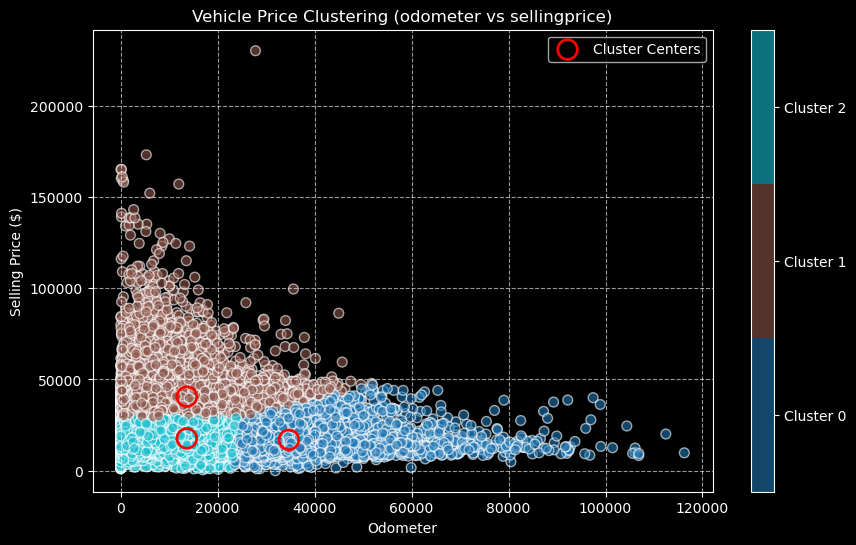

Silhouette Score: 0.448

Cluster Distribution:
Cluster 0: 25328 vehicles
Cluster 1: 10542 vehicles
Cluster 2: 41816 vehicles

Cluster Centroids:
   odometer  sellingprice
0  34689.40      16935.41
1  13643.81      40558.77
2  13637.35      17698.09


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

class PriceClusterAnalyzer:
    """
    A clustering analyzer for vehicle pricing data with dynamic feature selection

    Parameters:
    df -- Preprocessed DataFrame containing required features
    x_feature -- Horizontal axis feature (default: 'odometer')
                 Options: 'odometer', 'year', 'condition'
    """

    def __init__(self, df, x_feature='odometer'):
        self.df = df.copy()
        self.x_feature = x_feature
        self.y_feature = 'sellingprice'
        self._validate_features()
        self._filter_outliers()
        self._check_data_adequacy()
        self.scaler = StandardScaler()
        self.kmeans = None
        self.labels = None
        self.centroids = None

    def _validate_features(self):
        """Validate required features exist in DataFrame"""
        required_features = [self.x_feature, self.y_feature]
        missing = [f for f in required_features if f not in self.df.columns]
        if missing:
            raise ValueError(f"Missing required features: {missing}")
        if not all(self.df[required_features].dtypes.apply(np.issubdtype, args=(np.number,))):
            raise ValueError("All features must be numeric")

    def _filter_outliers(self):
        """Dynamic outlier filtering with unit validation"""
        original_size = len(self.df)


        x_stats = self.df[self.x_feature].describe()
        y_stats = self.df[self.y_feature].describe()


        if self.x_feature == 'condition':

            if y_stats['max'] < 1000:
                raise ValueError("Selling price units appear abnormal (max < $1000). Check data unit.")


            filtered = self.df[self.y_feature] <= 80000
            self.df = self.df[filtered]
            print(f"Price filtering: Removed {original_size - len(self.df)} records")

        elif self.x_feature == 'odometer':

            if x_stats['max'] < 1:
                print("Warning: Odometer values appear normalized (max < 1). Adjusting filter threshold.")
                threshold = 0.15
            else:

                threshold = 120000
                print(f"Applying odometer threshold: {threshold:,} miles")

            filtered = self.df[self.x_feature] <= threshold
            self.df = self.df[filtered]
            print(f"Odometer filtering: Removed {original_size - len(self.df)} records")

    def _check_data_adequacy(self):

        if len(self.df) == 0:
            raise ValueError("No data remaining after filtering. Check filter thresholds and data units.")
        if len(self.df) < 50:
            warnings.warn(f"Low sample size after filtering ({len(self.df)} records). Results may be unreliable.")



    def perform_clustering(self, n_clusters=4):
        """Execute K-means clustering with selected features"""

        features = [self.x_feature, self.y_feature]
        scaled_data = self.scaler.fit_transform(self.df[features])

        # Perform K-means clustering
        self.kmeans = KMeans(n_clusters=n_clusters,
                            init='k-means++',
                            n_init=10,
                            random_state=42)
        self.labels = self.kmeans.fit_predict(scaled_data)

        # Calculate centroids in original scale
        self.centroids = self.scaler.inverse_transform(self.kmeans.cluster_centers_)
        return self


    def visualize_clusters(self, figsize=(10,6), save_path=None):
      """Generate cluster visualization plot"""
      if self.kmeans is None:
          raise ValueError("Clustering not performed yet. Call perform_clustering() first")

      plt.figure(figsize=figsize)


      cmap = plt.cm.get_cmap('tab10', 3)

      # Create scatter plot
      scatter = plt.scatter(
          self.df[self.x_feature],
          self.df[self.y_feature],
          c=self.labels,
          cmap=cmap,
          alpha=0.6,
          edgecolors='w',
          s=50,
          vmin=-0.5,
          vmax=2.5
      )

      # Plot cluster centers
      plt.scatter(
          self.centroids[:, 0],
          self.centroids[:, 1],
          marker='o',
          s=200,
          edgecolors='red',
          facecolors='none',
          linewidths=2,
          label='Cluster Centers'
      )


      cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
      cbar.ax.set_yticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])

      plt.title(f'Vehicle Price Clustering ({self.x_feature} vs {self.y_feature})')
      plt.xlabel(self._format_label(self.x_feature))
      plt.ylabel(self._format_label(self.y_feature))
      plt.grid(True, linestyle='--', alpha=0.6)
      plt.legend()

      if save_path:
          plt.savefig(save_path, dpi=300, bbox_inches='tight')
      plt.show()
    def _format_label(self, feature):
        """Format axis labels for display"""
        labels = {
            'odometer': 'Odometer',
            'year': 'Manufacture Year',
            'condition': 'Condition Score',
            'sellingprice': 'Selling Price ($)'
        }
        return labels.get(feature, feature.replace('_', ' ').title())

    def generate_report(self):
        """Generate clustering analysis report"""
        if self.kmeans is None:
            raise ValueError("Clustering not performed yet. Call perform_clustering() first")

        return {
            'x_feature': self.x_feature,
            'y_feature': self.y_feature,
            'n_clusters': self.kmeans.n_clusters,
            'silhouette_score': silhouette_score(
                self.df[[self.x_feature, self.y_feature]],
                self.labels
            ),
            'cluster_distribution': pd.Series(self.labels).value_counts().sort_index().to_dict(),
            'centroids': pd.DataFrame(
                self.centroids,
                columns=[self.x_feature, self.y_feature]
            ).round(2).to_dict(orient='records')
        }


if __name__ == "__main__":

    analyzer = PriceClusterAnalyzer(df, x_feature='odometer')


    analyzer.perform_clustering(n_clusters=3)


    analyzer.visualize_clusters(save_path='odometer_clusters.png')

    report = analyzer.generate_report()
    print(f"Silhouette Score: {report['silhouette_score']:.3f}")
    print("\nCluster Distribution:")
    for cluster, count in report['cluster_distribution'].items():
        print(f"Cluster {cluster}: {count} vehicles")

    print("\nCluster Centroids:")
    print(pd.DataFrame(report['centroids']))

## Prediction

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 62164, number of used features: 42
[LightGBM] [Info] Start training from score 20573.544769
✅ Models saved successfully! Path: saved_models/car_models_20250404_201844_v1.joblib

Model Performance Metrics:

LR Model:
R2: 0.2849
MSE: 76400453.6674
MAE: 5953.8903
RMSE: 8740.7353

RF Model:
R2: 0.9013
MSE: 10546799.2335
MAE: 1810.3017
RMSE: 3247.5836

LGBM Model:
R2: 0.8371
MSE: 17408157.2804
MAE: 2496.1161
RMSE: 4172.3084

XGB Model:
R2: 0.7466
MSE: 27069697.8427
MAE: 3038.8015
RMSE: 5202.8548


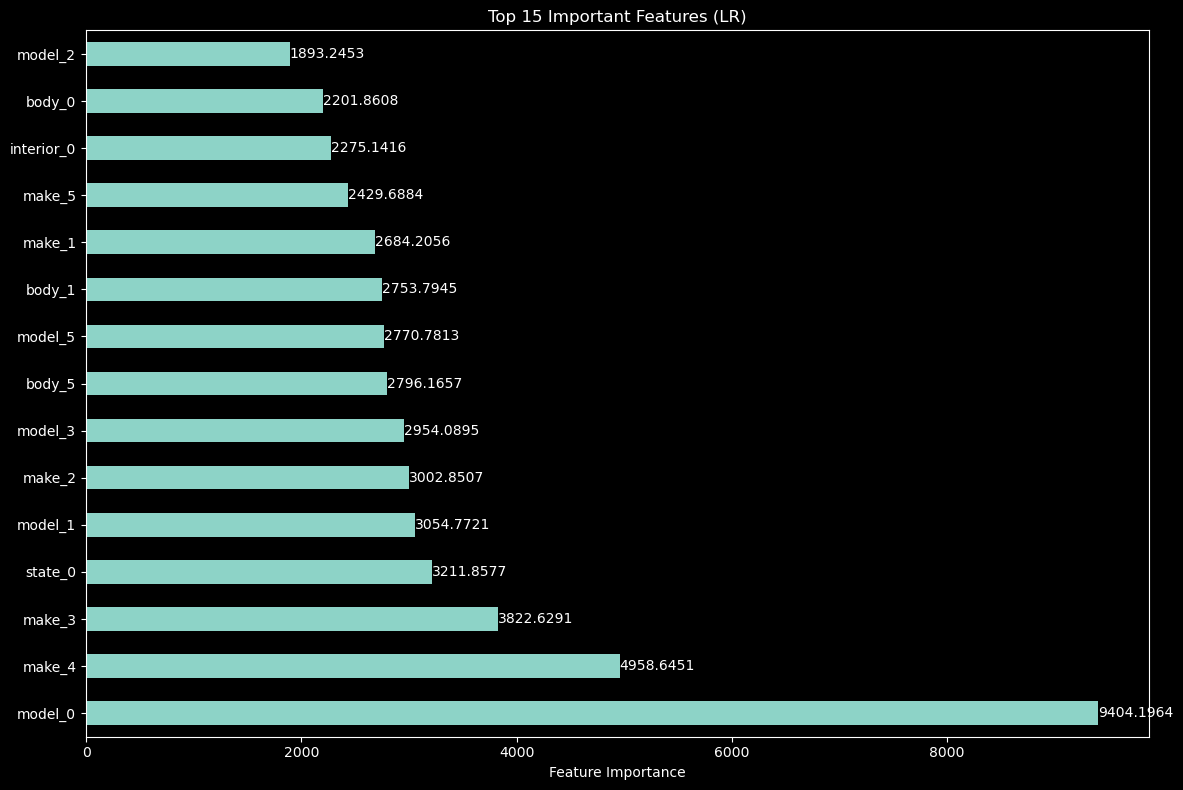


LR Feature Importance:
model_0: 9404.1964
make_4: 4958.6451
make_3: 3822.6291
state_0: 3211.8577
model_1: 3054.7721
make_2: 3002.8507
model_3: 2954.0895
body_5: 2796.1657
model_5: 2770.7813
body_1: 2753.7945
make_1: 2684.2056
make_5: 2429.6884
interior_0: 2275.1416
body_0: 2201.8608
model_2: 1893.2453


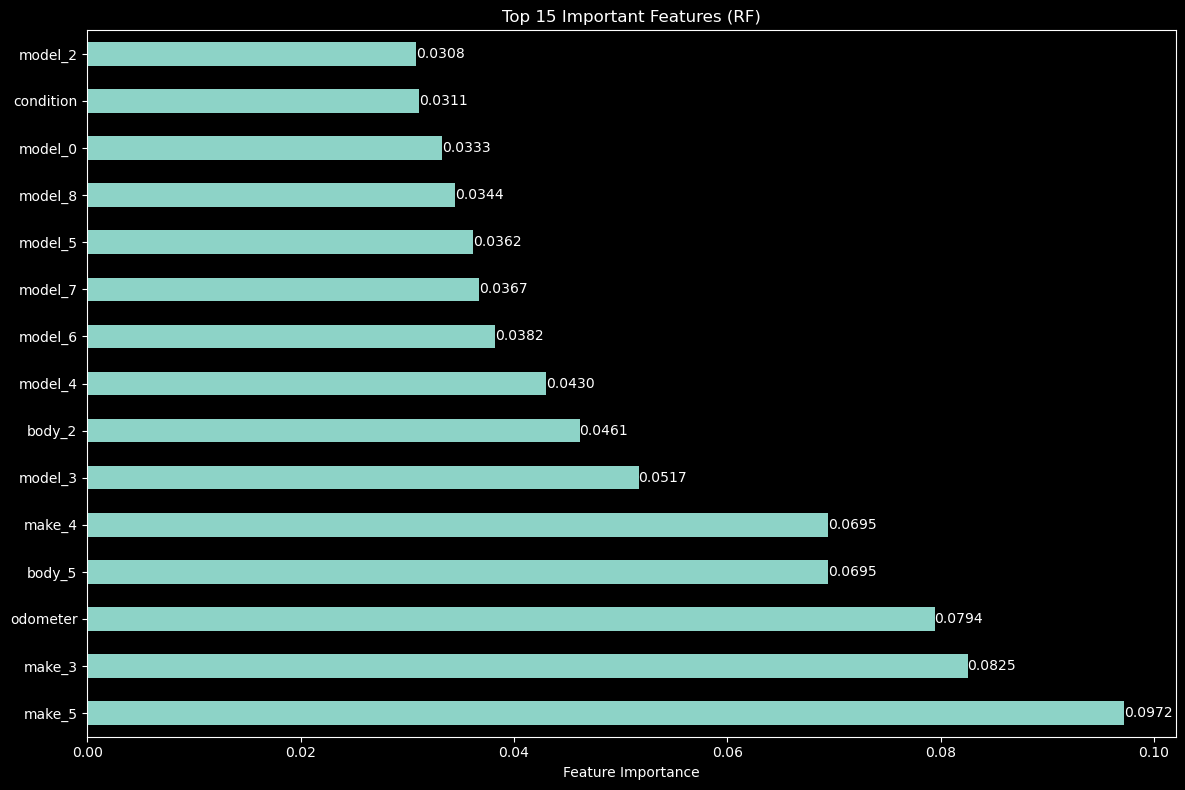


RF Feature Importance:
make_5: 0.0972
make_3: 0.0825
odometer: 0.0794
body_5: 0.0695
make_4: 0.0695
model_3: 0.0517
body_2: 0.0461
model_4: 0.0430
model_6: 0.0382
model_7: 0.0367
model_5: 0.0362
model_8: 0.0344
model_0: 0.0333
condition: 0.0311
model_2: 0.0308


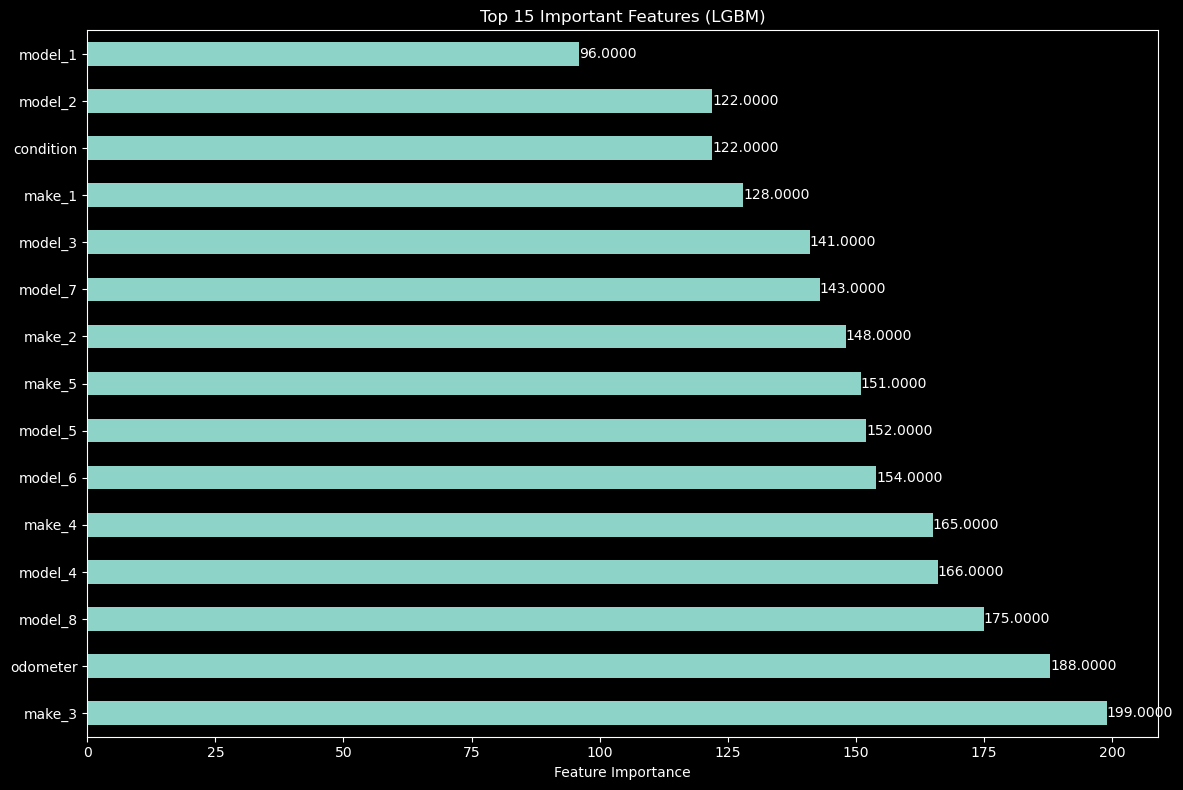


LGBM Feature Importance:
make_3: 199.0000
odometer: 188.0000
model_8: 175.0000
model_4: 166.0000
make_4: 165.0000
model_6: 154.0000
model_5: 152.0000
make_5: 151.0000
make_2: 148.0000
model_7: 143.0000
model_3: 141.0000
make_1: 128.0000
condition: 122.0000
model_2: 122.0000
model_1: 96.0000


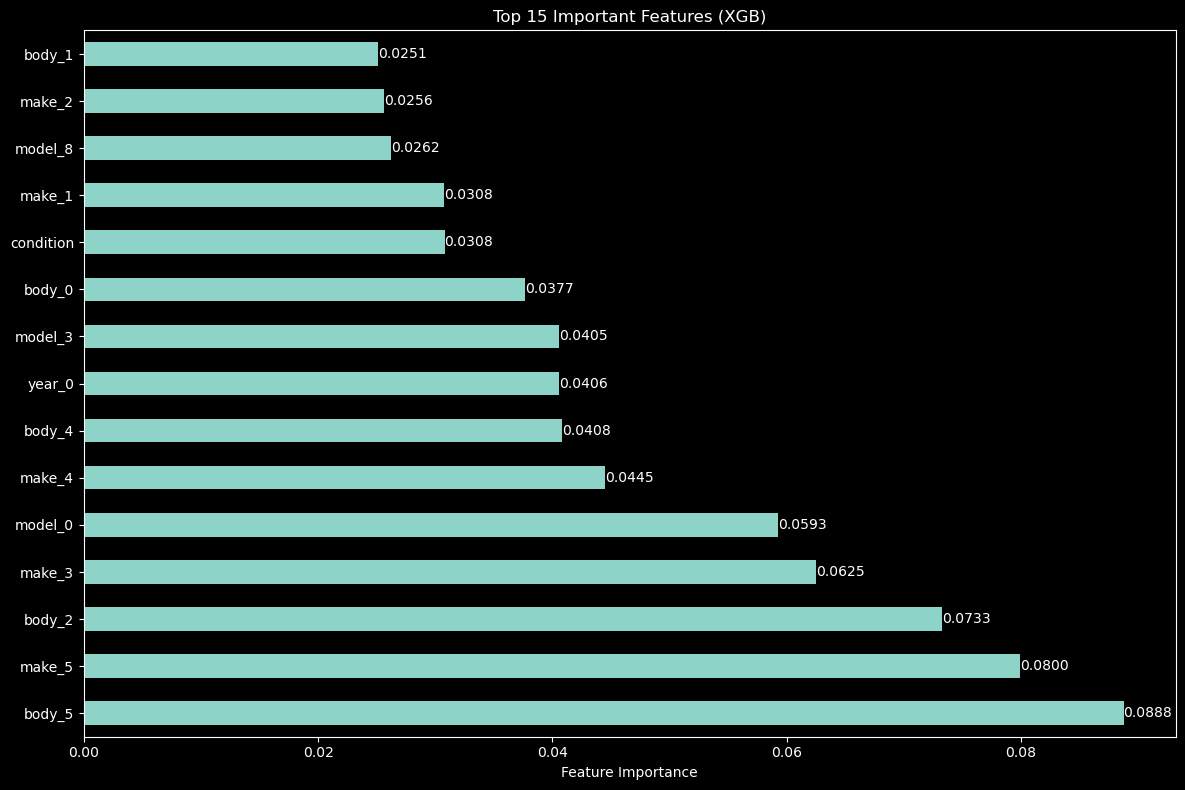


XGB Feature Importance:
body_5: 0.0888
make_5: 0.0800
body_2: 0.0733
make_3: 0.0625
model_0: 0.0593
make_4: 0.0445
body_4: 0.0408
year_0: 0.0406
model_3: 0.0405
body_0: 0.0377
condition: 0.0308
make_1: 0.0308
model_8: 0.0262
make_2: 0.0256
body_1: 0.0251

Input features:
model_6: 1
body_4: 1
state_5: 1
condition: 20
odometer: 75000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/py


Predictions:

LR Model:
Predicted Price: $-108,204,433.41
95% Confidence Interval: ($-3,913,279,924,749,630,976.00, $3,913,279,924,533,221,888.00)

RF Model:
Predicted Price: $17,907.00
95% Confidence Interval: ($9,100.00, $47,800.00)

LGBM Model:
Predicted Price: $26,022.05
95% Confidence Interval: ($17,336.27, $26,451.87)

XGB Model:
Predicted Price: $20,021.09
95% Confidence Interval: ($20,021.09, $20,021.09)


In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os
from datetime import datetime
import joblib
import sklearn
class CarAnalyzer:
    def __init__(self, data):
        """Initialize with pre-encoded data"""
        self.data = data
        self.scaler = StandardScaler()
        self.models = {}
        self.numeric_features = ['condition', 'odometer']  # Track numeric features for scaling

    def scale_numeric_features(self):
        """Scale numeric features using StandardScaler and save the scaler"""
        self.data[self.numeric_features] = self.scaler.fit_transform(self.data[self.numeric_features])
        return self.data

    def train_price_prediction_models(self, test_size=0.2):
        """Train multiple price prediction models including Linear Regression"""

        y = self.data['sellingprice']
        X = self.data.drop(['sellingprice'], axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        models = {}
        predictions = {}
        feature_importance = {}


        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)
        models['LR'] = lr_model
        predictions['LR'] = lr_model.predict(X_test)
        feature_importance['LR'] = pd.Series(np.abs(lr_model.coef_), index=X_train.columns)


        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_model.fit(X_train, y_train)
        models['RF'] = rf_model
        predictions['RF'] = rf_model.predict(X_test)
        feature_importance['RF'] = pd.Series(rf_model.feature_importances_, index=X_train.columns)

        lgb_model = lgb.LGBMRegressor(random_state=42)
        lgb_model.fit(X_train, y_train)
        models['LGBM'] = lgb_model
        predictions['LGBM'] = lgb_model.predict(X_test)
        feature_importance['LGBM'] = pd.Series(lgb_model.feature_importances_, index=X_train.columns)

        xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
        )
        xgb_model.fit(X_train, y_train)
        models['XGB'] = xgb_model
        predictions['XGB'] = xgb_model.predict(X_test)
        feature_importance['XGB'] = pd.Series(xgb_model.feature_importances_, index=X_train.columns)


        metrics = {}
        for model_name, y_pred in predictions.items():
            metrics[model_name] = {
                'R2': r2_score(y_test, y_pred),
                'MSE': mean_squared_error(y_test, y_pred),
                'MAE': mean_absolute_error(y_test, y_pred),
                'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
            }

        self.models = models
        return {
            'models': models,
            'metrics': metrics,
            'feature_importance': feature_importance,
            'test_data': (X_test, y_test)
        }

    def predict_price(self, features_dict):
      """Predict vehicle price using trained models with real-world inputs"""
      if not self.models:
          raise ValueError("Models not trained. Call train_price_prediction_models() first.")


      trained_features = self.data.drop('sellingprice', axis=1).columns.tolist()

      input_df = pd.DataFrame(0, index=[0], columns=trained_features)


      for feature, value in features_dict.items():
          if feature in input_df.columns:
              input_df[feature] = value
          else:
              print(f"Warning: Ignoring unrecognized feature '{feature}'")


      if self.numeric_features:
          input_df[self.numeric_features] = self.scaler.transform(input_df[self.numeric_features])

      predictions = {}
      for model_name, model in self.models.items():
          try:

              X_input = input_df.values


              pred = model.predict(X_input)[0]


              if model_name == 'RF':

                  bootstrap_preds = [tree.predict(X_input)[0] for tree in model.estimators_]
                  lower = np.percentile(bootstrap_preds, 2.5)
                  upper = np.percentile(bootstrap_preds, 97.5)

              elif model_name == 'LR':

                  X_train = self.data.drop('sellingprice', axis=1).values
                  X_design = np.c_[np.ones(len(X_train)), X_train]

                  try:
                      cov_matrix = np.linalg.inv(X_design.T @ X_design)
                  except np.linalg.LinAlgError:
                      cov_matrix = np.linalg.pinv(X_design.T @ X_design)


                  x_new = np.r_[1, X_input[0]]
                  var_pred = x_new @ cov_matrix @ x_new.T
                  mse = mean_squared_error(self.data['sellingprice'], model.predict(X_train))
                  stderr_pred = np.sqrt(mse * (1 + var_pred))

                  lower = pred - 1.96 * stderr_pred
                  upper = pred + 1.96 * stderr_pred

              elif model_name == 'LGBM':
                  num_iterations = model.n_estimators_


                  bootstrap_preds = [
                      model.predict(X_input, num_iteration=i+1)[0]
                      for i in range(num_iterations)
                  ]


                  if not bootstrap_preds:
                      raise ValueError("LightGBM failed to generate bootstrap predictions")

                  lower = np.percentile(bootstrap_preds, 2.5)
                  upper = np.percentile(bootstrap_preds, 97.5)
              elif model_name == 'XGB':

                  n_bootstrap = 100
                  bootstrap_preds = []
                  for _ in range(n_bootstrap):

                      sample_idx = np.random.choice(len(X_input), size=len(X_input), replace=True)
                      X_sample = X_input[sample_idx]
                      pred_sample = model.predict(X_sample)
                      bootstrap_preds.append(pred_sample.mean())

                  lower = np.percentile(bootstrap_preds, 2.5)
                  upper = np.percentile(bootstrap_preds, 97.5)

              else:
                  lower = upper = pred

              predictions[model_name] = {
                  'prediction': float(pred),
                  'lower_bound': float(lower),
                  'upper_bound': float(upper)
              }
          except Exception as e:
              raise ValueError(f"Prediction failed for {model_name}: {str(e)}")

      return predictions

    def analyze_feature_importance(self, top_n=10):
        """Analyze feature importance for all models"""
        if not self.models:
            raise ValueError("Models have not been trained yet. Call train_price_prediction_models first.")

        feature_importance = {}
        for model_name, model in self.models.items():
            if model_name == 'LR':
                importance = pd.Series(
                    np.abs(model.coef_),
                    index=self.data.drop('sellingprice', axis=1).columns,
                    name='importance'
                )
            else:
                importance = pd.Series(
                    model.feature_importances_,
                    index=self.data.drop('sellingprice', axis=1).columns,
                    name='importance'
                )

            feature_importance[model_name] = importance.sort_values(ascending=False).head(top_n)

        return feature_importance

    def plot_feature_importance(analyzer):
        """Plot feature importance for all models"""
        feature_importance = analyzer.analyze_feature_importance(top_n=15)

        for model_name, importance in feature_importance.items():
            plt.figure(figsize=(12, 8))
            ax = importance.plot(kind='barh')
            plt.title(f'Top 15 Important Features ({model_name})')
            plt.xlabel('Feature Importance')

            for i, v in enumerate(importance):
                ax.text(v, i, f'{v:.4f}', va='center')

            plt.tight_layout()
            plt.show()

            print(f"\n{model_name} Feature Importance:")
            for feat, imp in importance.items():
                print(f"{feat}: {imp:.4f}")


    def save_models(self, save_dir="saved_models", tag=""):
        """Save all trained models and preprocessing tools
        Args:
            save_dir (str): Directory to save models
            tag (str): Custom identifier (optional)
        Returns:
            str: Path to saved model file
        """
        # Create directory if not exists
        os.makedirs(save_dir, exist_ok=True)

        # Generate unique filename
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"car_models_{timestamp}"
        if tag:
            filename += f"_{tag}"
        save_path = os.path.join(save_dir, filename + ".joblib")

        save_data = {
            'models': self.models,
            'scaler': self.scaler,
            'numeric_features': self.numeric_features,
            'trained_features': self.data.drop('sellingprice', axis=1).columns.tolist(),
            'metadata': {
                'creation_time': timestamp,
                'library_versions': {
                    'sklearn': sklearn.__version__,
                    'xgboost': xgb.__version__,
                    'lightgbm': lgb.__version__,
                    'pandas': pd.__version__
                }
            }
        }


        joblib.dump(save_data, save_path)
        print(f"✅ Models saved successfully! Path: {save_path}")
        return save_path

    @classmethod
    def load_models(cls, model_path):
        """Load trained models from file
        Args:
            model_path (str): Path to model file
        Returns:
            CarAnalyzer: Loaded instance with restored models
        Raises:
            FileNotFoundError: If model file doesn't exist
        """
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model file not found: {model_path}")


        loaded_data = joblib.load(model_path)


        analyzer = cls(pd.DataFrame(columns=loaded_data['trained_features'] + ['sellingprice']))
        analyzer.models = loaded_data['models']
        analyzer.scaler = loaded_data['scaler']
        analyzer.numeric_features = loaded_data['numeric_features']


        meta = loaded_data['metadata']
        print(f"⏰ Model saved at: {meta['creation_time']}")
        print("📚 Library versions:")
        for lib, ver in meta['library_versions'].items():
            print(f"  - {lib}: {ver}")

        return analyzer

analyzer = CarAnalyzer(df_copy)
analyzer.scale_numeric_features()

model_results = analyzer.train_price_prediction_models()
saved_path = analyzer.save_models(tag="v1")
print("\nModel Performance Metrics:")
for model_name, metrics in model_results['metrics'].items():
    print(f"\n{model_name} Model:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

analyzer.plot_feature_importance()



feature_names = [col for col in analyzer.data.columns
                if col not in ['sellingprice']]

example_car = {feature: 0 for feature in feature_names}

example_car.update({
    'condition': 20,
    'odometer': 75000,
    'state_5': 1,
    'model_6': 1,
    'body_4': 1,
})

print("\nInput features:")
for name, value in example_car.items():
    if value != 0:
        print(f"{name}: {value}")

predictions = analyzer.predict_price(example_car)
print("\nPredictions:")
for model_name, pred in predictions.items():
    print(f"\n{model_name} Model:")
    print(f"Predicted Price: ${pred['prediction']:,.2f}")
    print(f"95% Confidence Interval: (${pred['lower_bound']:,.2f}, ${pred['upper_bound']:,.2f})")

In [72]:
print(feature_names)

['year_0', 'year_1', 'make_0', 'make_1', 'make_2', 'make_3', 'make_4', 'make_5', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'body_0', 'body_1', 'body_2', 'body_3', 'body_4', 'body_5', 'transmission_0', 'transmission_1', 'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'condition', 'odometer', 'color_0', 'color_1', 'color_2', 'color_3', 'color_4', 'interior_0', 'interior_1', 'interior_2', 'interior_3', 'interior_4']
